# Twitch Stream Analysis

## overview

This analysis provides an in-depth examination of Twitch streaming data from 2016 to 2023, focusing on key metrics such as hours watched, hours streamed, game rankings, peak viewers, peak channels, average viewers, and average channels. Twitch, as one of the leading platforms for live streaming, particularly in gaming, has experienced significant growth and shifts in viewership patterns over the years. Understanding these metrics helps to capture the evolution of both the platform and the gaming community at large.

In [19]:
#import libraries

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt



In [120]:
#import csvs
game_data_df = pd.read_csv('./Twitch_game_data.csv',header=0,encoding='windows-1252')
global_data_df = pd.read_csv('./Twitch_global_data.csv',header=0,encoding='windows-1252') 

In [121]:
game_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18600 entries, 0 to 18599
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              18600 non-null  int64  
 1   Game              18599 non-null  object 
 2   Month             18600 non-null  int64  
 3   Year              18600 non-null  int64  
 4   Hours_watched     18600 non-null  int64  
 5   Hours_streamed    18600 non-null  int64  
 6   Peak_viewers      18600 non-null  int64  
 7   Peak_channels     18600 non-null  int64  
 8   Streamers         18600 non-null  int64  
 9   Avg_viewers       18600 non-null  int64  
 10  Avg_channels      18600 non-null  int64  
 11  Avg_viewer_ratio  18600 non-null  float64
dtypes: float64(1), int64(10), object(1)
memory usage: 1.7+ MB


In [122]:
game_data_df.head()

,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03


In [124]:
#create a df that aggregates the of hours watched and hours streamed
twitch_years = game_data_df.groupby('Year')
streamed_watched_hours = twitch_years.agg({"Hours_watched":"sum","Hours_streamed":"sum"})
streamed_watched_hours = streamed_watched_hours.reset_index()


In [24]:
streamed_watched_hours

,Year,Hours_watched,Hours_streamed
0,2016,5082766384,134438174
1,2017,6044740005,165167993
2,2018,8588082625,285239100
3,2019,10029602019,342095241
4,2020,16976473071,610412169
5,2021,22145586100,725171459
6,2022,20397399743,612074847
7,2023,14352774355,468947106


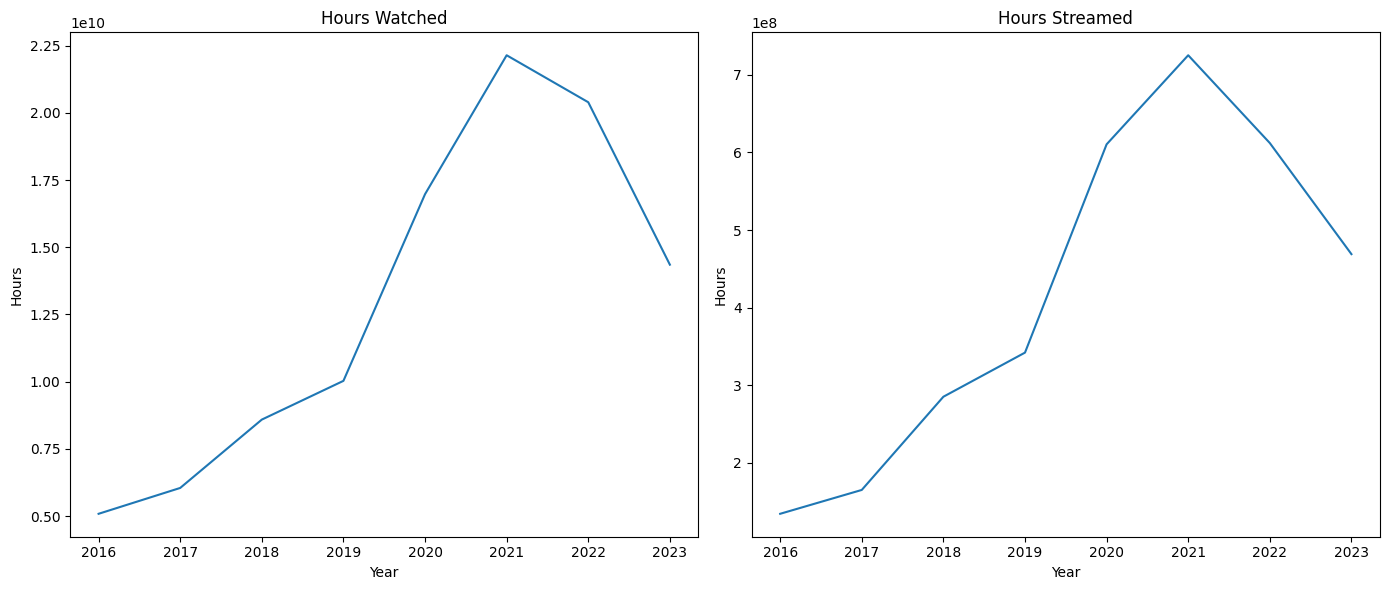

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# Plot 1: Hours_watched
sns.lineplot(data=streamed_watched_hours, x='Year', y='Hours_watched', ax=axs[0])
axs[0].set_title('Hours Watched')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Hours')

# Plot 2: Hours_streamed
sns.lineplot(data=streamed_watched_hours, x='Year', y='Hours_streamed', ax=axs[1])
axs[1].set_title('Hours Streamed')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Hours')

# Adjust layout
plt.tight_layout()
plt.show()

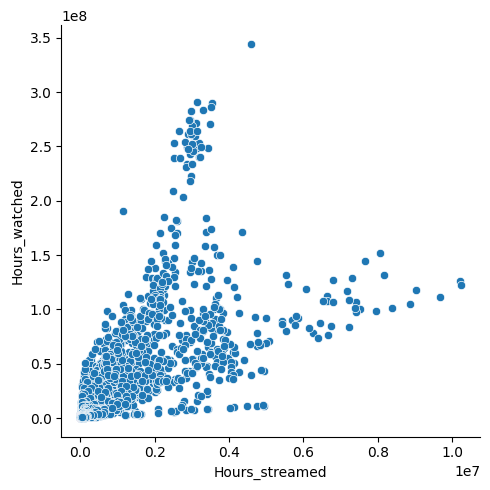

In [64]:
sns.relplot(data=game_data_df,x='Hours_streamed',y='Hours_watched')

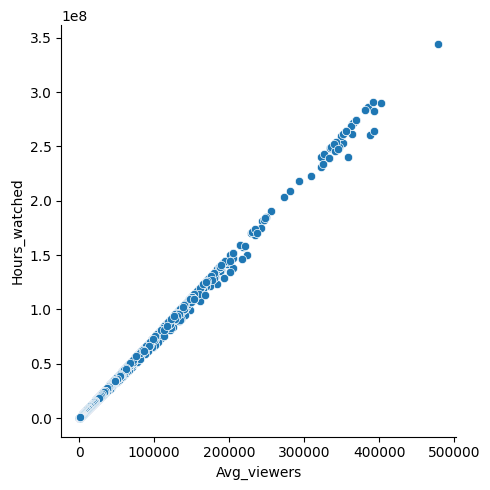

In [26]:
sns.relplot(data=game_data_df,x='Avg_viewers',y='Hours_watched')

In [27]:
lol_game = game_data_df[game_data_df['Game']=='League of Legends']
peak_views = lol_game.groupby(['Year']).agg({"Peak_viewers":"sum"})
lol_avg_views = lol_game.groupby(['Year']).agg({'Avg_viewers':'sum'})

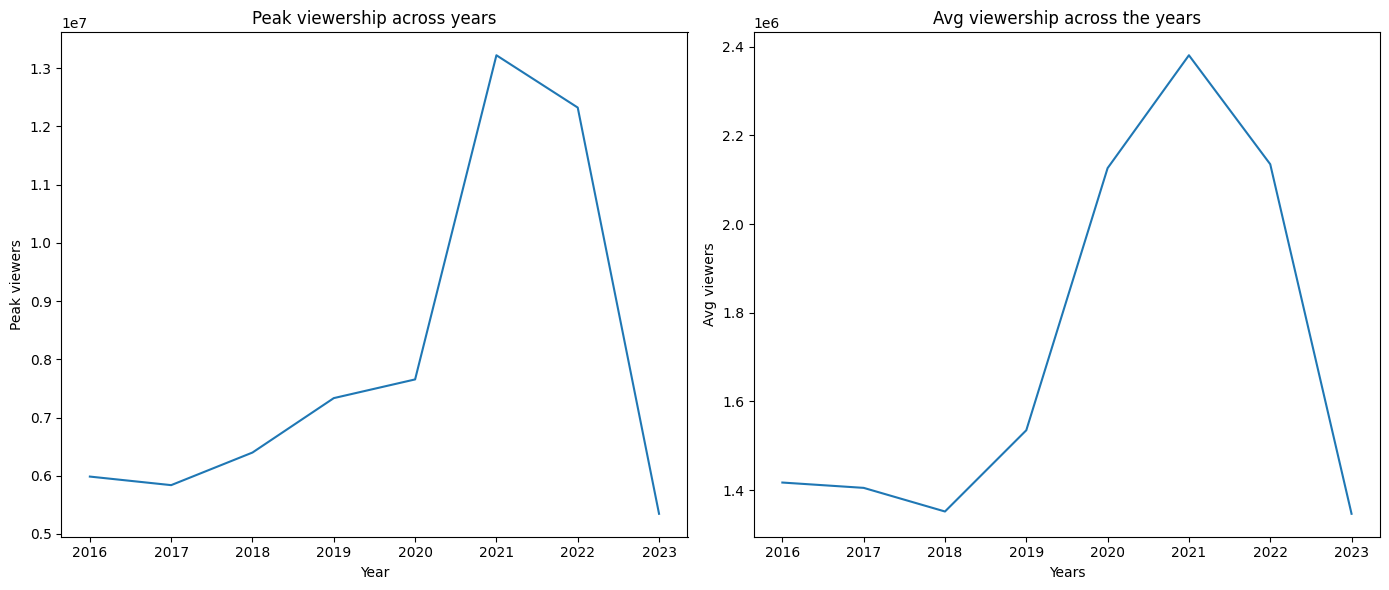

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.lineplot(data=peak_views, x='Year', y='Peak_viewers', ax=axs[0])
axs[0].set_title('Peak viewership across years')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Peak viewers')

sns.lineplot(data=lol_avg_views, x='Year', y='Avg_viewers', ax=axs[1])
axs[1].set_title('Avg viewership across the years')
axs[1].set_xlabel('Years')
axs[1].set_ylabel('Avg viewers')

plt.tight_layout()
plt.show()

In [35]:
top10 = game_data_df.groupby(['Year','Game']).agg({'Hours_watched':'sum'}).sort_values(by='Hours_watched',ascending=False).head(10)
top10

Hours_watched
Year Game                             
2022 Just Chatting          3139111208
2021 Just Chatting          3020771657
2023 Just Chatting          2336790283
2020 Just Chatting          1995891029
2021 Grand Theft Auto V     1874989023
     League of Legends      1735661105
2022 League of Legends      1556699612
2020 League of Legends      1553536532
2022 Grand Theft Auto V     1414287042
2018 Fortnite               1358048914

In [41]:
avgHours_years = game_data_df.groupby('Year').agg({'Hours_watched':'mean'})
avgHours_years['Hours_watched'] = avgHours_years['Hours_watched'].map(lambda x: int(x))

In [45]:
avgChannels_years = game_data_df.groupby('Year').agg({'Avg_channels':'mean'})
avgChannels_years

,Avg_channels
Year,
2016,76.152917
2017,93.907917
2018,162.395417
2019,195.207083
2020,347.054583
2021,414.436667
2022,349.634583
2023,358.060000


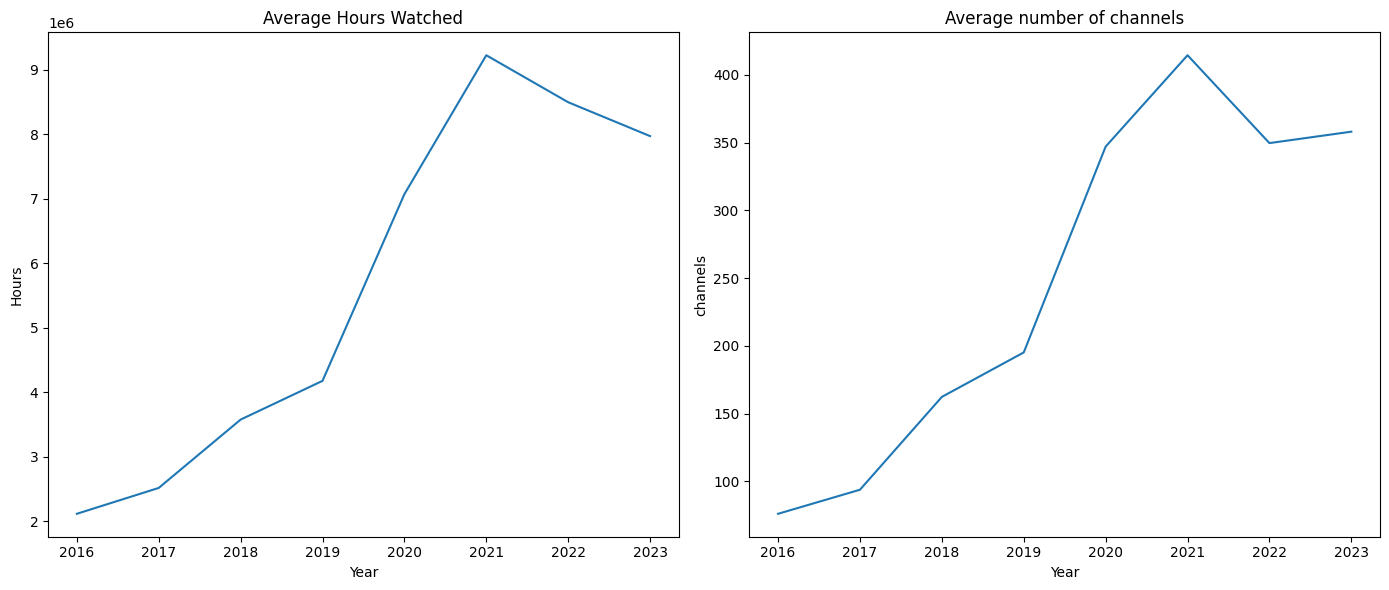

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))


sns.lineplot(data=avgHours_years, x='Year', y='Hours_watched', ax=axs[0])
axs[0].set_title('Average Hours Watched')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Hours')

# Plot 2: Hours_streamed
sns.lineplot(data=avgChannels_years, x='Year', y='Avg_channels', ax=axs[1])
axs[1].set_title('Average number of channels')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('channels')

# Adjust layout
plt.tight_layout()
plt.show()

In [59]:
#top 3 years with the most streams
global_data_df.groupby('year').agg({'Streams':'sum'}).nlargest(3,'Streams')

,Streams
year,
2022,284871753
2021,257692526
2020,220187428


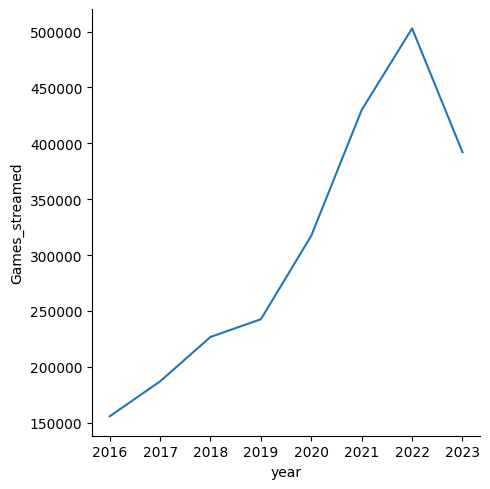

In [62]:
games_streamed = global_data_df.groupby('year').agg({'Games_streamed':'sum'})
sns.relplot(data=games_streamed,x='year',y='Games_streamed',kind='line')

In [65]:
game_data_df

,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03
...,...,...,...,...,...,...,...,...,...,...,...,...
18595,196,PlateUp!,9,2023,560064,18617,16476,71,4034,778,25,30.08
18596,197,PokÃ©mon GO,9,2023,551596,16578,3001,73,3926,767,23,33.27
18597,198,Bloons TD 6,9,2023,540735,20142,10320,65,5673,752,28,26.85
18598,199,Ragnarok Online,9,2023,533644,27014,11508,68,1144,742,37,19.75


In [108]:
X = game_data_df[['Hours_streamed','Streamers','Avg_viewers','Avg_channels']]
y = game_data_df['Hours_watched']

In [109]:
print(X)

       Hours_streamed  Streamers  Avg_viewers  Avg_channels
0             1362044     129172       127021          1833
1              830105     120849        64378          1117
2              433397      44074        60815           583
3              235903      36170        53749           317
4             1151578     214054        21740          1549
...               ...        ...          ...           ...
18595           18617       4034          778            25
18596           16578       3926          767            23
18597           20142       5673          752            28
18598           27014       1144          742            37
18599           36741       6652          737            51

[18600 rows x 4 columns]


In [110]:
print(y)

0        94377226
1        47832863
2        45185893
3        39936159
4        16153057
           ...   
18595      560064
18596      551596
18597      540735
18598      533644
18599      530610
Name: Hours_watched, Length: 18600, dtype: int64


In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [112]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train,y_train)

LinearRegression()

In [113]:
y_pred = regressor.predict(X_test)
y_pred = y_pred.astype(int).reshape((len(y_pred),1))

y_test = np.asarray(y_test).astype(int).reshape((len(y_test),1))


In [114]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 73591.29758064516


In [115]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 154760635544.25296


In [116]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 393396.2830839317


In [117]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


R-squared: 0.999568784243211


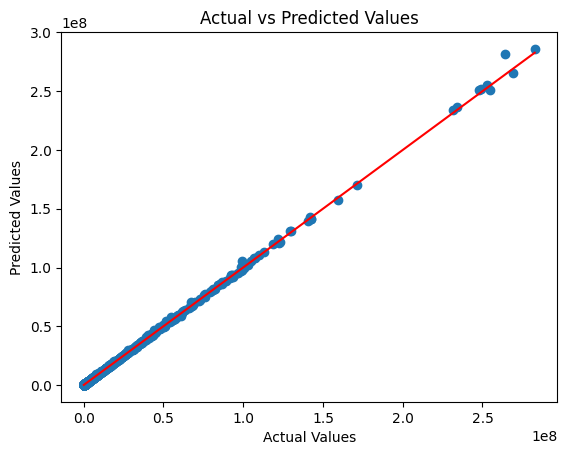

In [119]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
